In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Loading the MLB dataset

In [2]:
data_set=pd.read_csv("../Data_Science/data/nfl_games.csv")
datadup=pd.read_csv("../Data_Science/data/nfl_games.csv")


In [3]:
data_set.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16274 entries, 0 to 16273
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       16274 non-null  object 
 1   season     16274 non-null  int64  
 2   neutral    16274 non-null  int64  
 3   playoff    16274 non-null  int64  
 4   team1      16274 non-null  object 
 5   team2      16274 non-null  object 
 6   elo1       16274 non-null  float64
 7   elo2       16274 non-null  float64
 8   elo_prob1  16274 non-null  float64
 9   score1     16274 non-null  int64  
 10  score2     16274 non-null  int64  
 11  result1    16274 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.5+ MB


In [5]:
Team1board = []
Team2board = []
for index, row in data_set.iterrows():
    if row.score1>row.score2:
        Team1board.append(1)
        Team2board.append(0)
    else:
        Team1board.append(0)
        Team2board.append(1)

In [6]:
data_set['Team1board'] = pd.DataFrame(Team1board, index =data_set.index)
data_set.tail()
data_set['Team2board'] = pd.DataFrame(Team2board, index =data_set.index)
data_set.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,Team1board,Team2board
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0,1,0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0,1,0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0,1,0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0,1,0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0,1,0


#### Calculating the count of wins for each team

#### count of the wins for team 1

In [7]:

WinCounts1 = data_set.groupby(['team1'])['Team1board'].sum().reset_index()
WinCounts1 = WinCounts1.rename(columns={'team1': 'team'})

#### count of the wins for team 2

In [8]:

WinCounts2 = data_set.groupby(['team2'])['Team2board'].sum().reset_index()
WinCounts2 = WinCounts2.rename(columns={'team2': 'team'})

#### Calculating the total wincounts of each team

In [9]:

Wincounts=pd.merge(WinCounts1,WinCounts2,how='outer',on=['team'])
Wincounts=Wincounts.fillna(0)
Wincounts.Team1board = Wincounts.Team1board.astype(int)
Wincounts.Team2board = Wincounts.Team2board.astype(int)
Wincounts.isnull().any()

team          False
Team1board    False
Team2board    False
dtype: bool

#### Merging both the teams wincounts

In [10]:
Wincounts['Totalwins'] = Wincounts['Team1board'] + Wincounts['Team2board'] 
Wincounts=Wincounts.sort_values(['Totalwins'], ascending=[False]).reset_index()
Wincounts.head()

,index,team,Team1board,Team2board,Totalwins
0,15,CHI,455,341,796
1,42,GB,452,343,795
2,69,NYG,406,327,733
3,75,PIT,389,282,671
4,99,WSH,361,279,640


In [11]:
dataset1 = pd.DataFrame(Wincounts, columns=['team', 'Totalwins'])
dataset2=dataset1.rename(columns={'team': 'team1'})
dataset3=dataset1.rename(columns={'team': 'team2'})

#### calculating the number of games each team played

In [12]:
PlayCounts1 = data_set.groupby(['team1'])['Team1board'].count().reset_index()
PlayCounts1 = PlayCounts1.rename(columns={'team1': 'team'})
PlayCounts1

,team,Team1board
0,AKR,23
1,ARI,664
2,ATL,419
3,BAL,192
4,BBA,27
...,...,...
96,TOR,11
97,UAP,1
98,WGC,1
99,WSH,641


In [13]:
PlayCounts2 = data_set.groupby(['team2'])['Team2board'].count().reset_index()
PlayCounts2 = PlayCounts2.rename(columns={'team2': 'team'})
PlayCounts2

,team,Team2board
0,ABU,2
1,AKR,41
2,ARI,688
3,ATL,421
4,ATN,3
...,...,...
103,UTI,2
104,WBU,1
105,WHE,1
106,WJA,1


In [14]:
PlayCounts=pd.merge(PlayCounts1,PlayCounts2,how='outer',on=['team'])
PlayCounts=PlayCounts.fillna(0)
PlayCounts.Team1board = PlayCounts.Team1board.astype(int)
PlayCounts.Team2board = PlayCounts.Team2board.astype(int)
PlayCounts.isnull().any()

team          False
Team1board    False
Team2board    False
dtype: bool

In [15]:
PlayCounts['Totalplays'] = PlayCounts['Team1board'] + PlayCounts['Team2board'] 
PlayCounts=PlayCounts.sort_values(['Totalplays'], ascending=[False]).reset_index()

In [16]:
PlayCounts['team'].nunique()
dataplay = pd.DataFrame(PlayCounts, columns=['team', 'Totalplays'])
dataplay.head()

,team,Totalplays
0,CHI,1422
1,GB,1408
2,NYG,1370
3,ARI,1352
4,DET,1269


#### To calculate winrate of each team merging the wincounts and play counts 

In [17]:
Finaldata=pd.merge(dataset1,dataplay,how='outer',on=['team'])
Finaldata=Finaldata.fillna(0)
Finaldata.head()

,team,Totalwins,Totalplays
0,CHI,796,1422
1,GB,795,1408
2,NYG,733,1370
3,PIT,671,1249
4,WSH,640,1260


In [18]:
Finaldata['winrate'] = Finaldata['Totalwins']/Finaldata['Totalplays']
Finaldata = pd.DataFrame(Finaldata, columns=['team', 'winrate'])
Finaldata['team']=Finaldata['team']
Finaldata1=Finaldata.rename(columns={'team': 'team1'})
Finaldata2=Finaldata.rename(columns={'team': 'team2'})

Finaldata.head()

,team,winrate
0,CHI,0.559775
1,GB,0.564631
2,NYG,0.535036
3,PIT,0.537230
4,WSH,0.507937


In [19]:
Finaldata.dtypes

team        object
winrate    float64
dtype: object

#### Plotting a plot to see winrate vs team

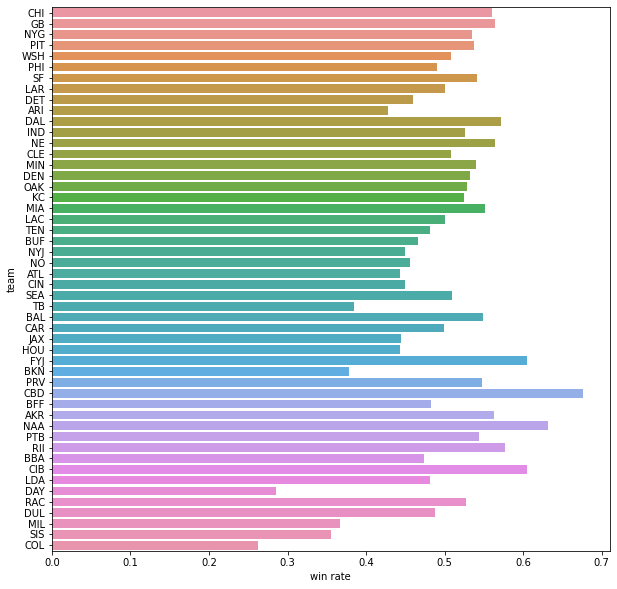

In [20]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='winrate',y='team',data=Finaldata.head(50))
ax.set(xlabel='win rate', ylabel='team')
plt.show()

#### Calculating winrates,elo ratings, and probabilities 

In [21]:
teams = set(datadup.team2.values)
teams.update(list(datadup.team1.values))
len(teams)

123

In [22]:
avg_data = pd.DataFrame(columns = [ 'team1', 'team2', 'elo1', 'elo2', 'score1', 'score2', 'elo_prob1'])

isdone = set()

def getDict(input_data, output_data):
    temp = dict()
    temp['team1'] = input_data.iloc[0,4]
    temp['team2'] = input_data.iloc[0,5]
    temp['elo1'] = input_data.elo1.mean()
    temp['elo2'] = input_data.elo2.mean()
    temp['score1'] = input_data.score1.mean()
    temp['score2'] = input_data.score2.mean()
    temp['elo_prob1'] = input_data.elo_prob1.mean()
    return temp

avg_data_list = list()
for A in teams:
    for B in teams:
        if( A == B):
            continue
        if(not( A+B in isdone)):
            isdone.add(A+B)
            isdone.add(B+A)
            filter1 = (data_set.team1 == A) & (data_set.team2 == B)
            filter2 = (data_set.team1 == B) & (data_set.team2 == A)
            filtered_data = data_set.where(filter1 | filter2).dropna()
            if( len(filtered_data.index) > 0):
                avg_data_list.append(getDict(filtered_data, avg_data))


avg_data = avg_data.append(avg_data_list)

In [23]:
avg_data.dtypes

team1         object
team2         object
elo1         float64
elo2         float64
score1       float64
score2       float64
elo_prob1    float64
dtype: object

#### Changing the datatype of score1 and score2 from float  to int

In [24]:
avg_data.score1=avg_data.score1.astype(int)
avg_data.score2=avg_data.score2.astype(int)

In [25]:
avg_data.to_csv('avg_data', index=False, encoding='utf-8')

#### Merging the winrate with avg_data

In [26]:
avg_data=pd.merge(avg_data,Finaldata1,on='team1')
avg_data.head()

,team1,team2,elo1,elo2,score1,score2,elo_prob1,winrate
0,NAA,BBA,1398.315625,1386.566375,19,18,0.602912,0.631579
1,NAA,MSA,1255.048000,1276.404000,12,26,0.543652,0.631579
2,NAA,BDA,1332.024500,1364.123000,16,14,0.536629,0.631579
3,CRA,BBA,1295.315250,1328.694875,29,20,0.541471,0.240741
4,CRA,NAA,1334.117625,1345.079250,23,24,0.563565,0.240741


In [27]:
avg_data=pd.merge(avg_data,Finaldata2,on='team2')
avg_data.head()

,team1,team2,elo1,elo2,score1,score2,elo_prob1,winrate_x,winrate_y
0,NAA,BBA,1398.315625,1386.566375,19,18,0.602912,0.631579,0.473684
1,CRA,BBA,1295.315250,1328.694875,29,20,0.541471,0.240741,0.473684
2,NAA,MSA,1255.048000,1276.404000,12,26,0.543652,0.631579,0.214286
3,CRA,MSA,1226.479500,1226.267000,17,13,0.590049,0.240741,0.214286
4,BBA,MSA,1172.833000,1224.409000,17,15,0.518929,0.473684,0.214286


In [28]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
avg_data['team1'] = le.fit_transform(avg_data['team1'])
avg_data['team2'] = le.fit_transform(avg_data['team2'])
avg_data.head()

,team1,team2,elo1,elo2,score1,score2,elo_prob1,winrate_x,winrate_y
0,62,6,1398.315625,1386.566375,19,18,0.602912,0.631579,0.473684
1,23,6,1295.315250,1328.694875,29,20,0.541471,0.240741,0.473684
2,62,66,1255.048000,1276.404000,12,26,0.543652,0.631579,0.214286
3,23,66,1226.479500,1226.267000,17,13,0.590049,0.240741,0.214286
4,4,66,1172.833000,1224.409000,17,15,0.518929,0.473684,0.214286


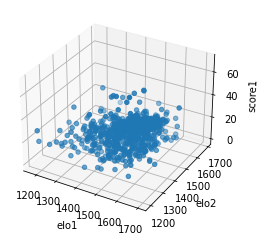

In [29]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(avg_data['elo1'], avg_data['elo2'], avg_data['score1'])
threedee.set_xlabel('elo1')
threedee.set_ylabel('elo2')
threedee.set_zlabel('score1')
plt.show()

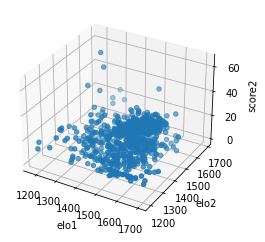

In [30]:
threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(avg_data['elo1'], avg_data['elo2'], avg_data['score2'])
threedee1.set_xlabel('elo1')
threedee1.set_ylabel('elo2')
threedee1.set_zlabel('score2')
plt.show()

#### Below I have found the correlations between all columns

<AxesSubplot:>

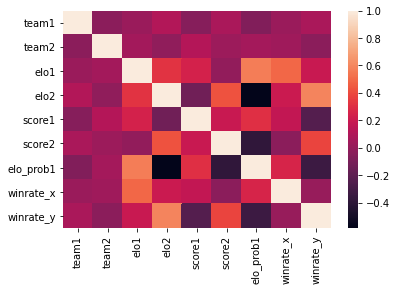

In [31]:
corr = avg_data.corr()
sns.heatmap(corr)

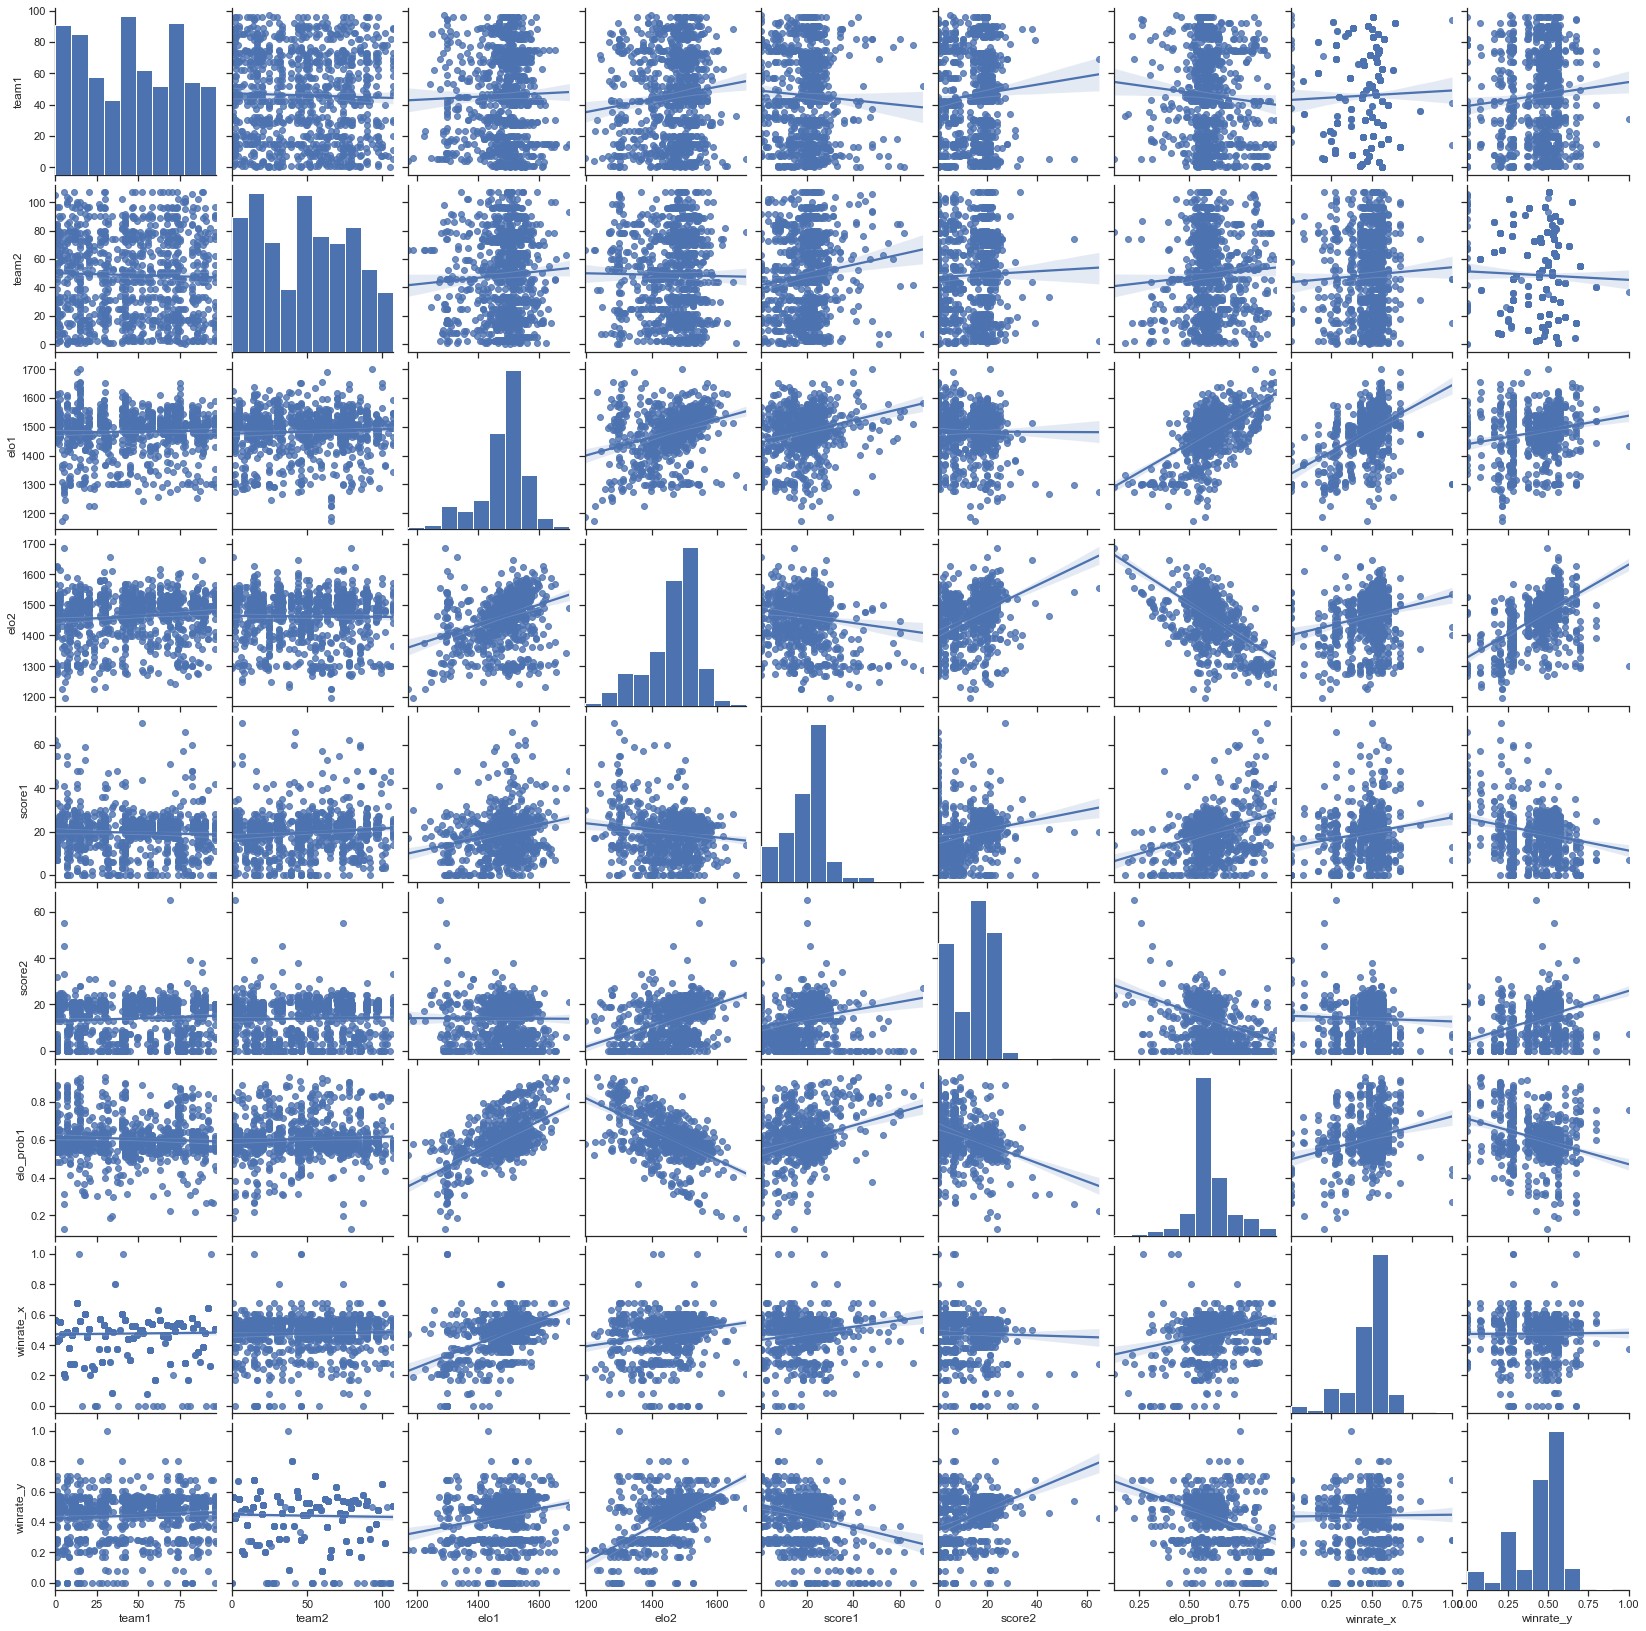

In [32]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(avg_data, kind="reg")

In [33]:
#Making the dependent and independent variables
X1=avg_data.drop(columns=['score1'])
X2=avg_data.drop(columns=['score2'])
Y1 = pd.DataFrame(avg_data, columns = ['score1'])
Y2 = pd.DataFrame(avg_data, columns = ['score2'])

#### Spliting the dataset into train set and test set with 20% test data and 80% train data

In [34]:
from sklearn.model_selection import train_test_split

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, Y1, test_size=0.2)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, Y2, test_size=0.2)

## Linear Regression

In [35]:
#Fitting the first training set
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain1,ytrain1)

LinearRegression()

In [36]:
# Finding the regression coefficient
regr.coef_

array([[-1.08425254e-02,  2.26881943e-02,  8.54176225e-02,
        -7.20836949e-02,  4.50625465e-01, -3.41858261e+01,
         6.02953425e+00, -1.68274651e+01]])

In [37]:
# Finding the regression line intercept
regr.intercept_

array([16.75112044])

In [38]:
#Rounding of to integer
y1prediction1=np.round(regr.predict(xtest1))

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(ytest1, y1prediction1))

Mean squared error: 75.09


In [40]:
print('Variance score: %.2f' % r2_score(ytest1, y1prediction1))

Variance score: 0.32


In [61]:
print("Linear regression:")
regr.score(xtest1,ytest1)

Linear regression:


-0.6566785840832292

#### Claculating the confusion matrix between actual and predicted values

In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest1,y1prediction1)

Text(0.5, 156.5, 'truth')

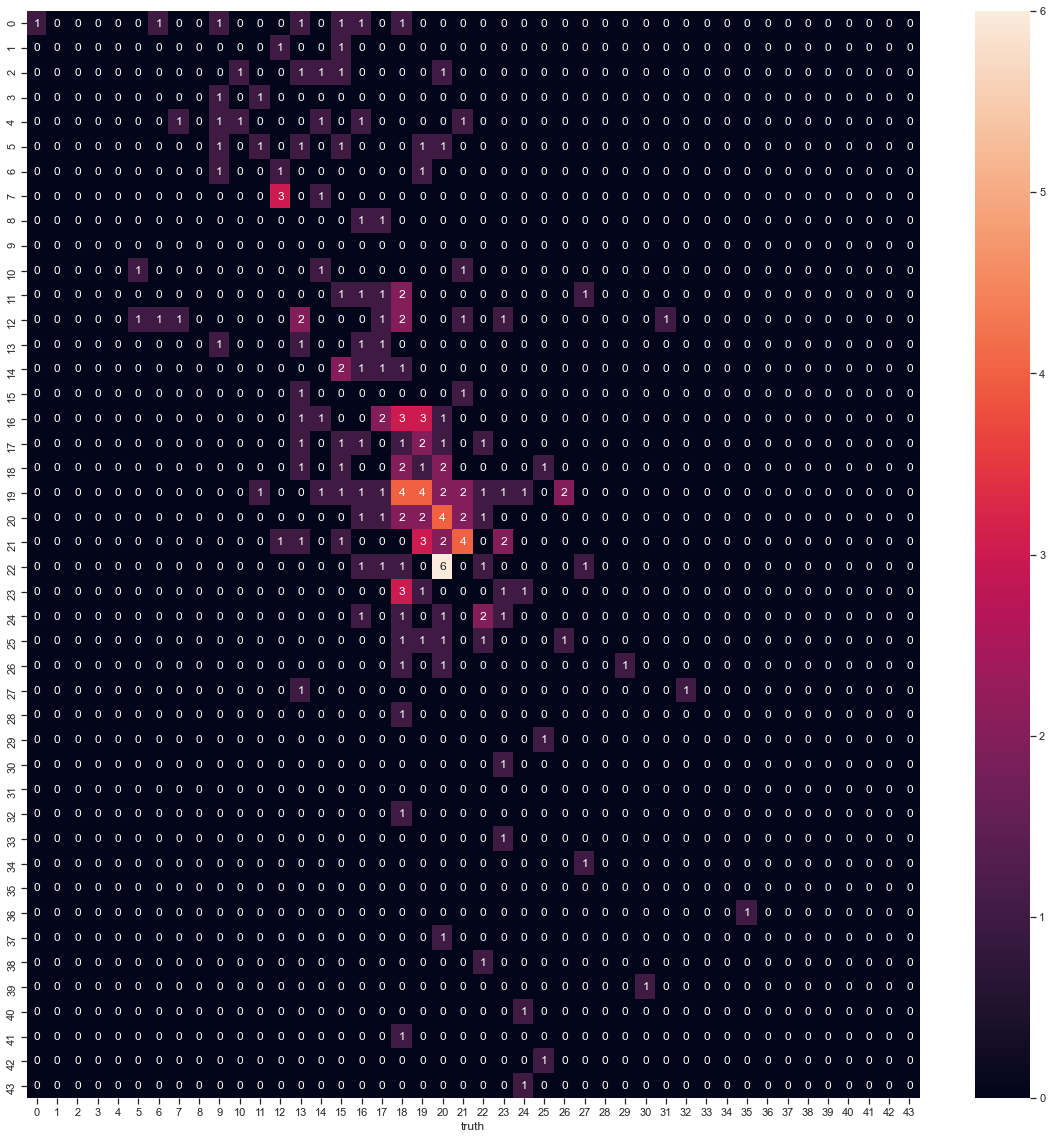

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.xlabel('truth')

In [44]:
#Fitting the first training set
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain2,ytrain2)

LinearRegression()

In [45]:
# Finding the regression coefficient
regr.coef_

array([[ 1.70769068e-02,  3.47620252e-03,  2.81244738e-02,
        -1.55301018e-02,  3.44285277e-01, -4.59708666e+01,
        -3.42120944e+00,  1.80649203e+01]])

In [46]:
# Finding the regression line intercept
regr.intercept_

array([8.51378381])

In [47]:
#Rounding of to integer
y2prediction2=np.round(regr.predict(xtest2))

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(ytest2, y2prediction2))

Mean squared error: 40.77


In [49]:
print('Variance score: %.2f' % r2_score(ytest2, y2prediction2))

Variance score: 0.36


In [50]:
regr.score(xtest1,ytest1)

-1.4755454644379284

## Random forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                        random_state=10, shuffle=False)
regr = RandomForestRegressor(max_depth=50, random_state=0,
                              n_estimators=40)
regr.fit(xtrain1, ytrain1.values.ravel())

RandomForestRegressor(max_depth=50, n_estimators=40, random_state=0)

In [52]:
ypredictionforest=np.round(regr.predict(xtest1))

In [62]:
print("Random forest regression:")
regr.score(xtest1,ytest1)

Random forest regression:


-0.6566785840832292

#### Claculating the confusion matrix between actual and predicted values

In [54]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest1,ypredictionforest)

Text(0.5, 156.5, 'truth')

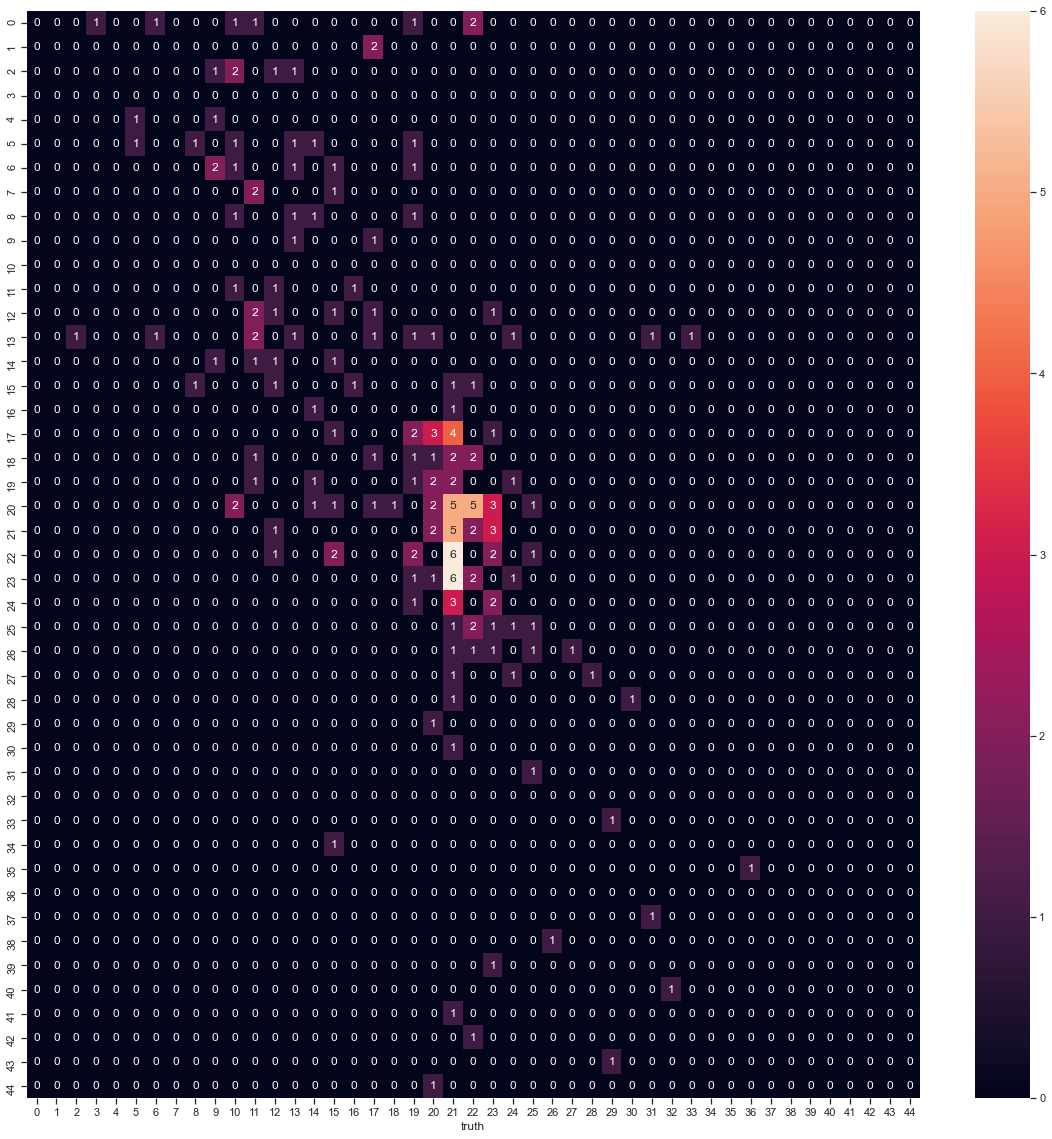

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.xlabel('truth')

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                        random_state=10, shuffle=False)
regr = RandomForestRegressor(max_depth=50, random_state=0,
                              n_estimators=40)
regr.fit(xtrain2, ytrain2.values.ravel())

RandomForestRegressor(max_depth=50, n_estimators=40, random_state=0)

In [57]:
ypredictionforest=np.round(regr.predict(xtest2))

In [58]:
regr.score(xtest2,ytest2)

0.6056330249965307

## Result : I got the accuracy more for Random forest  when compared to Linear Regression